In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import cm
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [2]:
content = [i.strip().split(",") for i in open("banana.dat").readlines()][7:]

with open("banana.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(content)

In [3]:
dataframe = pd.read_csv("banana.csv", header=None)

In [4]:
kernel = ['sigmoid', 'rbf', 'poly']
gamma = [1, 0.5, 0.01]
fold = [2, 5, 10]

for i in kernel:
    for j in fold:
        if i != 'poly':
            for k in gamma:
                svc = svm.SVC(kernel=i, gamma=k)
                scores = cross_val_score(svc, dataframe[[0, 1]], dataframe[2], cv=j)
                print('kernel:', i, '/ gamma:', k, '/ fold:', j, '/ error:', 1 - np.mean(scores))
        else:
            svc = svm.SVC(kernel=i)
            scores = cross_val_score(svc, dataframe[[0, 1]], dataframe[2], cv=j)
            print('kernel:', i, '/ fold:', j, '/ error:', 1 - np.mean(scores))

kernel: sigmoid / gamma: 1 / fold: 2 / error: 0.7181132075471698
kernel: sigmoid / gamma: 0.5 / fold: 2 / error: 0.7077358490566038
kernel: sigmoid / gamma: 0.01 / fold: 2 / error: 0.44830188679245286
kernel: sigmoid / gamma: 1 / fold: 5 / error: 0.7179245283018868
kernel: sigmoid / gamma: 0.5 / fold: 5 / error: 0.7073584905660377
kernel: sigmoid / gamma: 0.01 / fold: 5 / error: 0.44830188679245286
kernel: sigmoid / gamma: 1 / fold: 10 / error: 0.7188679245283018
kernel: sigmoid / gamma: 0.5 / fold: 10 / error: 0.7075471698113207
kernel: sigmoid / gamma: 0.01 / fold: 10 / error: 0.44830188679245286
kernel: rbf / gamma: 1 / fold: 2 / error: 0.09415094339622643
kernel: rbf / gamma: 0.5 / fold: 2 / error: 0.09622641509433971
kernel: rbf / gamma: 0.01 / fold: 2 / error: 0.430377358490566
kernel: rbf / gamma: 1 / fold: 5 / error: 0.09320754716981128
kernel: rbf / gamma: 0.5 / fold: 5 / error: 0.09754716981132072
kernel: rbf / gamma: 0.01 / fold: 5 / error: 0.41471698113207545
kernel: rbf / 

In [5]:
linear_svc = svm.LinearSVC()

for k in fold:
    scores = cross_val_score(linear_svc, dataframe[[0, 1]], dataframe[2], cv=k)
    print('kernel: linear / fold:', k, '/ error:', 1 - np.mean(scores))

kernel: linear / fold: 2 / error: 0.47905660377358494
kernel: linear / fold: 5 / error: 0.4513207547169811
kernel: linear / fold: 10 / error: 0.4424528301886792


In [7]:
neighbors = [5, 11, 15, 21, 25, 31, 35, 41, 45, 51]

fold = [2, 5, 10]

final_scores = []

for K in neighbors:
    knn = KNeighborsClassifier(K)
    for k in fold:
        scores = cross_val_score(knn, dataframe[[0, 1]], dataframe[2], cv=k)
        print(K, '&', k, '&', round(100.*(1 - np.mean(scores)), 2))

5 & 2 & 10.81
5 & 5 & 11.08
5 & 10 & 11.06
11 & 2 & 10.26
11 & 5 & 10.3
11 & 10 & 10.36
15 & 2 & 9.98
15 & 5 & 10.11
15 & 10 & 10.13
21 & 2 & 9.79
21 & 5 & 9.92
21 & 10 & 9.87
25 & 2 & 9.77
25 & 5 & 9.75
25 & 10 & 9.77
31 & 2 & 9.81
31 & 5 & 9.47
31 & 10 & 9.66
35 & 2 & 9.77
35 & 5 & 9.62
35 & 10 & 9.66
41 & 2 & 9.87
41 & 5 & 9.53
41 & 10 & 9.55
45 & 2 & 10.11
45 & 5 & 9.7
45 & 10 & 9.66
51 & 2 & 9.96
51 & 5 & 9.64
51 & 10 & 9.57


Text(0.5, 1.0, 'Diagrama de dispersão dos dados')

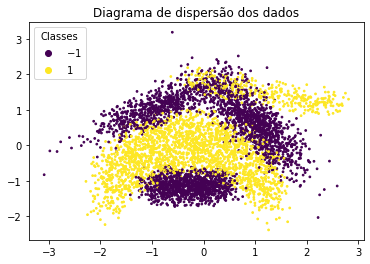

In [8]:
#plt.legend()
x = dataframe[0]
y = dataframe[1]
c = dataframe[2]

fig, ax = plt.subplots()
scatter = plt.scatter(x, y, s=3, c=c)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")

plt.title("Diagrama de dispersão dos dados")
#plt.savefig("banana.svg")

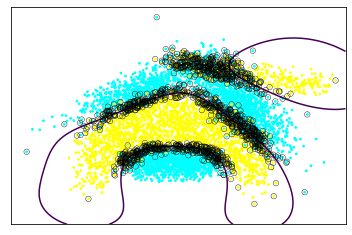

In [11]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = dataframe[[0, 1]]
Y = dataframe[2]
color_dict = {-1: 'cyan', 1: 'yellow'}

color_list = []

for i in Y:
    color_list.append(color_dict[i])

clf = svm.SVC(kernel='rbf', gamma=1)
clf.fit(X, Y)

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()

contours = plt.contour(xx, yy, Z, levels=[0])
plt.scatter(X[0], X[1], s=3, c=color_list)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30,
                facecolors='none', zorder=30, edgecolors='k', linewidth=0.4,
                cmap=cm.get_cmap('RdBu'))

plt.xticks(())
plt.yticks(())

#plt.savefig('banana_rbf')
plt.show()

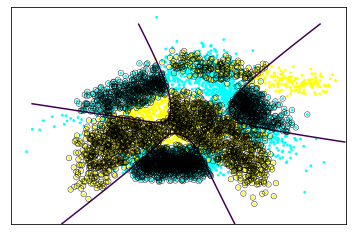

In [12]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = dataframe[[0, 1]]
Y = dataframe[2]
color_dict = {-1: 'cyan', 1: 'yellow'}

color_list = []

for i in Y:
    color_list.append(color_dict[i])

clf = svm.SVC(kernel='sigmoid')
clf.fit(X, Y)

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()

contours = plt.contour(xx, yy, Z, levels=[0])
plt.scatter(X[0], X[1], s=3, c=color_list)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30,
                facecolors='none', zorder=30, edgecolors='k', linewidth=0.4,
                cmap=cm.get_cmap('RdBu'))

plt.xticks(())
plt.yticks(())

#plt.savefig('banana_sigmoid')
plt.show()